# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 597
['port-aux-francais', 'college', 'invercargill', 'avarua', 'coahuayana de hidalgo', 'fuling', 'butterworth', 'carnarvon', 'jorpeland', 'udachny', 'adamstown', 'grytviken', 'flying fish cove', 'piacabucu', 'hirara', 'punta arenas', 'kijang', 'road town', 'makokou', 'selfoss', 'ushuaia', 'haiku-pauwela', 'edinburgh of the seven seas', 'geraldton', 'tiksi', 'puerto natales', 'klaksvik', 'papatowai', 'east london', 'caleta de carquin', 'bredasdorp', 'margaret river', 'hawaiian paradise park', 'ust-nera', 'afaahiti', 'mitsamiouli', 'miringa', 'creston', 'keflavik', 'remire-montjoly', 'blackmans bay', 'isafjordur', 'tashtagol', 'tazovsky', 'emerald', 'la sarre', 'waitangi', 'rosarito', 'jamestown', 'mount gambier', 'port alfred', 'woolgoolga', 'clewiston', 'yellowknife', 'suai', 'iqaluit', "ust'-ordynskiy", 'campbell river', 'sanliurfa', 'huarmey', 'elko', 'akureyri', 'sao gabriel', 'pavlohrad', 'anadyr', 'aleysk', 'inari', 'berezovyy', 'salinas', "ust'-ilim

print(weather_api_key)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
units = "metric"
url="https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
cities = [city.replace(' ', '') for city in cities]
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95d1fe9d343&units=metric&q=port-aux-francais
Processing Record 2 of Set 1 | college
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95d1fe9d343&units=metric&q=college
Processing Record 3 of Set 1 | invercargill
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95d1fe9d343&units=metric&q=invercargill
Processing Record 4 of Set 1 | avarua
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95d1fe9d343&units=metric&q=avarua
Processing Record 5 of Set 1 | coahuayanadehidalgo
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95d1fe9d343&units=metric&q=coahuayanadehidalgo
City not found. Skipping...
Processing Record 6 of Set 1 | fuling
https://api.openweathermap.org/data/2.5/weather?appid=fecba4f09e48b3a584ffb95

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          444
Lat           444
Lng           444
Max Temp      444
Humidity      444
Cloudiness    444
Wind Speed    444
Country       444
Date          444
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.77,97,100,15.37,TF,1723762700
1,college,64.8569,-147.8028,20.99,44,75,4.12,US,1723762701
2,invercargill,-46.4000,168.3500,8.34,86,100,0.45,NZ,1723762703
3,avarua,-21.2078,-159.7750,22.03,56,20,4.12,CK,1723762704
4,fuling,29.7022,107.3919,24.68,87,14,0.44,CN,1723762707


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("../Resources/cities.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("../Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.77,97,100,15.37,TF,1723762700
1,college,64.8569,-147.8028,20.99,44,75,4.12,US,1723762701
2,invercargill,-46.4000,168.3500,8.34,86,100,0.45,NZ,1723762703
3,avarua,-21.2078,-159.7750,22.03,56,20,4.12,CK,1723762704
4,fuling,29.7022,107.3919,24.68,87,14,0.44,CN,1723762707


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

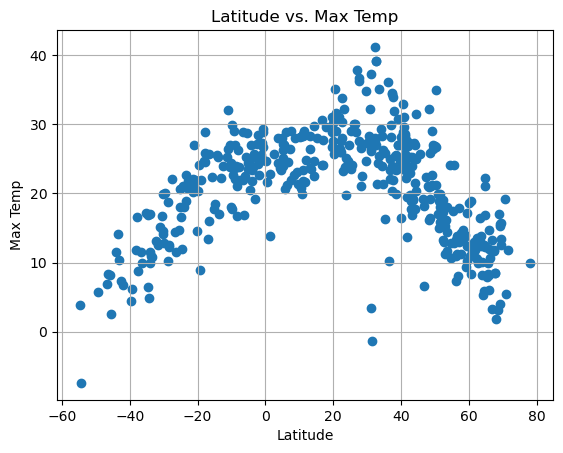

In [89]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

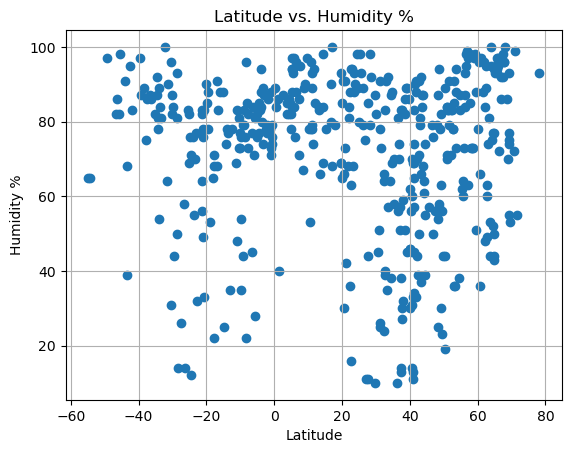

In [90]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title ("Latitude vs. Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

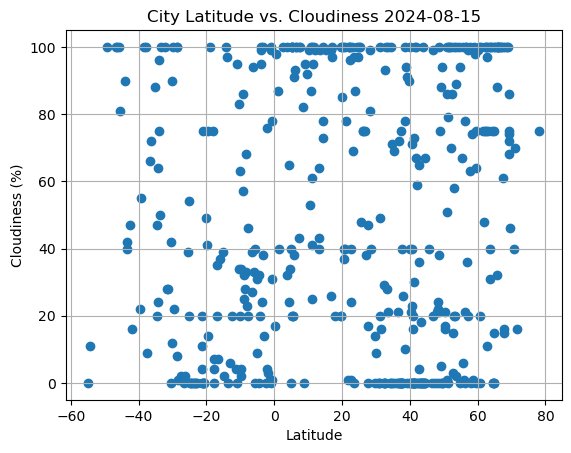

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
date = time.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

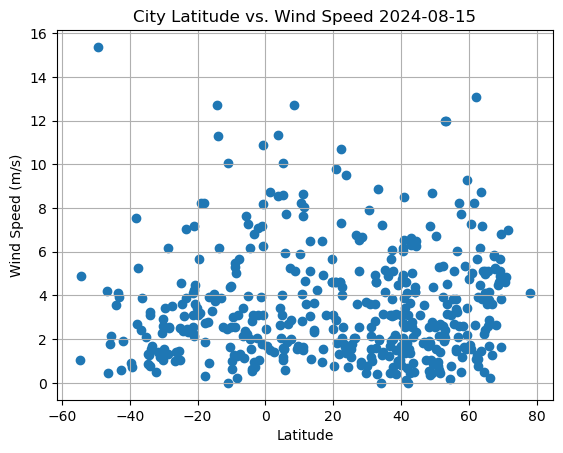

In [92]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,20.99,44,75,4.12,US,1723762701
4,fuling,29.7022,107.3919,24.68,87,14,0.44,CN,1723762707
5,butterworth,5.3991,100.3638,27.02,94,20,1.54,MY,1723762708
7,jorpeland,59.0225,6.0408,13.97,97,100,5.34,NO,1723762710
8,udachny,66.4167,112.4000,10.72,72,100,0.24,RU,1723762712


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.77,97,100,15.37,TF,1723762700
2,invercargill,-46.4000,168.3500,8.34,86,100,0.45,NZ,1723762703
3,avarua,-21.2078,-159.7750,22.03,56,20,4.12,CK,1723762704
6,carnarvon,-24.8667,113.6333,16.62,76,0,4.57,AU,1723762709
9,adamstown,-25.0660,-130.1015,20.61,69,54,2.52,PN,1723762713


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.39797


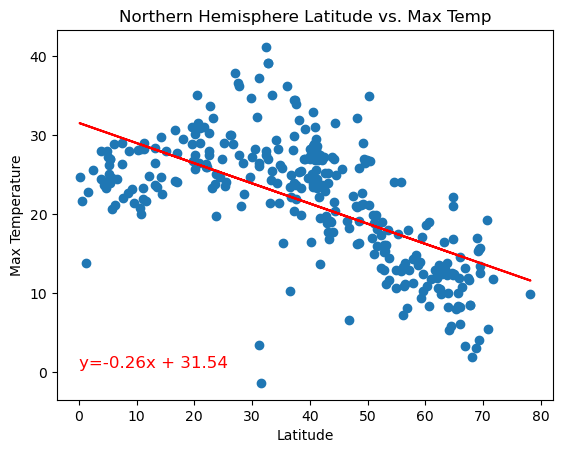

<Figure size 800x800 with 0 Axes>

In [93]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
slope, intercept, r_value, p_value, std_err=linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(0, 0.5, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
plt.figure(figsize = (8,8))
print(f"The r^2 value is {round(r_value**2,5)}")
plt.savefig("../output_data/LinReg_MaxTemp_North")

The r^2 value is 0.6992


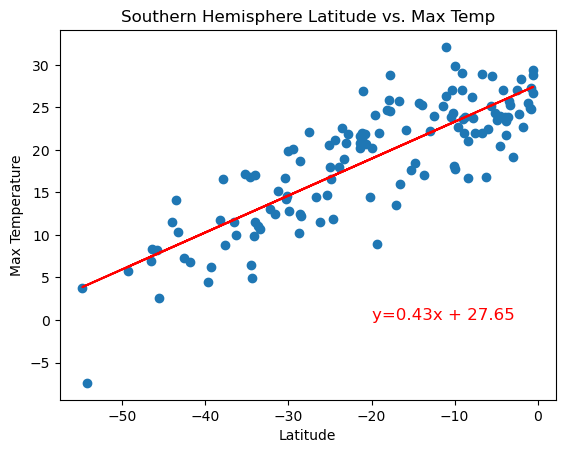

In [94]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
slope, intercept, r_value, p_value, std_err=linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(-20,0, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2,5)}")
plt.savefig("../output_data/LinReg_MaxTemp_South")

**Discussion about the linear relationship:** The scatterplots show that max temperatures are higher the closer you ware to the equator (latitude of 0) and the farter away you move out in either direction, north or south, the temperatures will decrease.  In the northern hemisphere, there is a moderate negative correlation (r^2 value of 0.39), which means that as you move up north the temperatures will decrease. In the southern hemisphere, there is a strong positive correlation (r^2 values of 0.73), which means that as you move closer to the euquator from the south the temperatures will increase.  Note that in the norther hemispheres we start in at latitude 0 and move away in the nothern direction and in the southern hemisphere we start at about latitude of -60 and move towards the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.00241


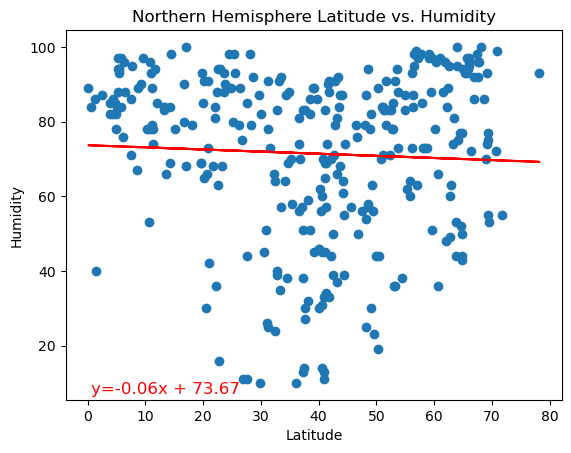

In [95]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
slope, intercept, r_value, p_value, std_err=linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(0.5, 7, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_Humidity_North")

The r^2 value is 0.0031


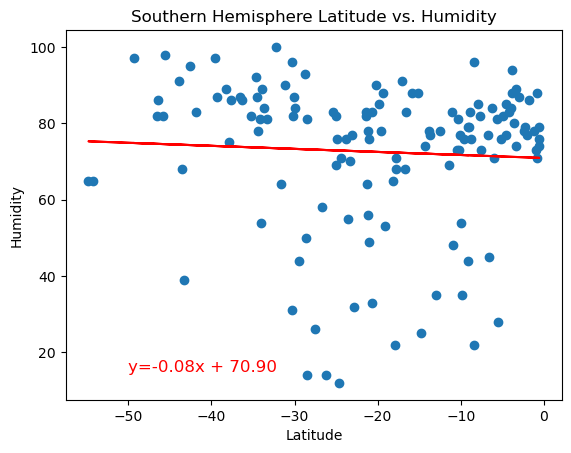

In [96]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
slope, intercept, r_value, p_value, std_err=linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(-50, 15, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_Humidity_South")

**Discussion about the linear relationship:** The scatterplots above are showing the relationship between latitude and humidity for the northern and southern hemispheres.  Both scatter plots are showing that there is no clear correlation between the latitude and the the humidity of a city.  In the northern hemisphere, the r^2 value is 0.00241 and in the southern hemisphere the r^2 values is 0.0031 which support there is no correlation between the latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.00247


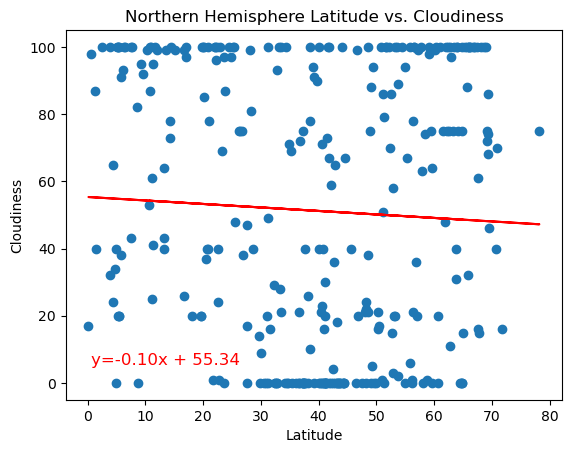

In [97]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err=linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(0.5, 5.5, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_Cloudiness_North")

The r^2 value is 0.02576


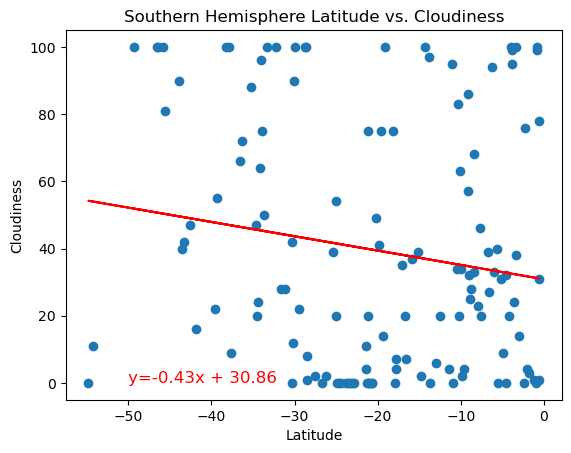

In [98]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
slope, intercept, r_value, p_value, std_err=linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(-50, 0, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_Cloudiness_South")

**Discussion about the linear relationship:** The scatterplots above are showing the relationship between latitude and cloudiness for the northern and southern hemisphere. Both scatterplots are showing that there is no clear correlation between the latitude and the cloudiness of a city. In the northern hemisphere, the r^2 value is 0.00247 and in the southern hemisphere the r^2 value is 0.02576 which support that there is no correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.00059


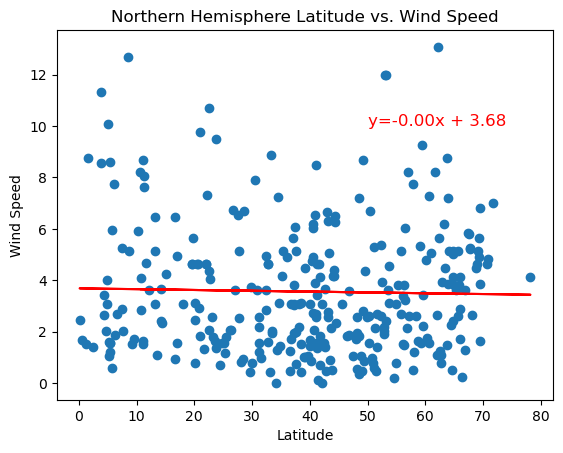

In [99]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err=linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(50, 10, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_WindSpeed_North")

The r^2 value is 0.0146


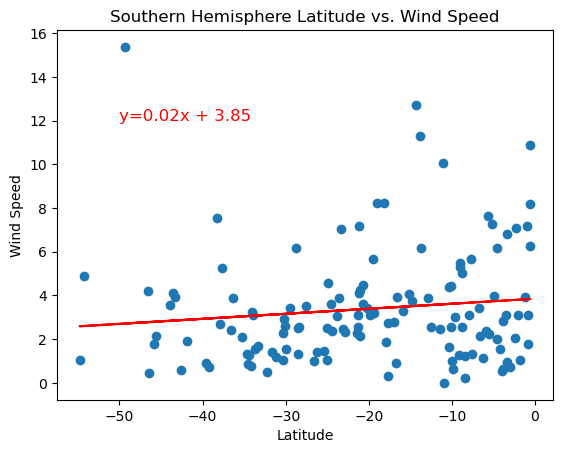

In [100]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
slope, intercept, r_value, p_value, std_err=linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
equation = f"y={slope:.2f}x + {intercept:.2f}"
plt.text(-50, 12, equation, color = "red", fontsize =12)
plt.plot(x, slope*x + intercept, color = "red", label= "Linear Regression Line")
print(f"The r^2 value is {round(r_value**2, 5)}")
plt.savefig("../output_data/LinReg_WindSpeed_South")

**Discussion about the linear relationship:** The scatterplots above are showing the relationship between latitude and wind speed for the northern and southern hemisphere. Both scatterplots are showing that there is no clear correlation between the latitude and the wind speed of a city. In the northern hemisphere, the r^2 value is 0.00059 and in the southern hemisphere the r^2 value is 0.0146 which support that there is no correlation between latitude and wind speed. 